<a href="https://colab.research.google.com/github/Aananda-giri/Bootcamps/blob/nnfs_book/nns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOT gate using neural networks. inputs are one of 0,1. Output is 1 when input is 0. output is 0 when input is 1.

# chapter-2

In [ ]:
# Single Neuron
import numpy as np

inputs = [1,2,3]
weights = [.2,.8,-.5] # each incoming connection to a neuron have one weight
bias = 2  # each neuron have single bias
output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias)
output

2.3

In [ ]:
# A layer of neurons (3 neurons)
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    # Neuron 1:
    inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,

    # Neuron 2:
    inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights3[2] + bias2,

    # Neuron 3:
    inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3
    ]
outputs

[4.8, 2.885, 2.385]

* Python list: Comma seperated objectss within brackets
* Array: Homogeneous list (i.e. rows have same number of columns)
* matrix: Rectangular Array
tensor: Objects that can be represented as an * array
Vector: 1-D array in numpy

In [ ]:
# Layer of neurons in numpy
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)


'''
* In np.dot: whatever come first determines the shape
* np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)]
'''

[4.8   1.21  2.385]


'\n* In np.dot: whatever come first determines the shape\n* np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)]\n'

In [ ]:
# A batch of data
'''
  neural networks tend to receive data in batches
'''


In [ ]:
np.array([[1,2,3]])


array([[1, 2, 3]])

In [ ]:
a = [1, 2, 3]
np.array(a).shape # (3,)
# np.expand_dims(np.array(a), axis=0).shape

(3,)

In [ ]:
# Inputs in Batches
import numpy as np
inputs = [
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
    ]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
  ]

biases = [2.0, 3.0, 0.5]
'''
Error because i/p is 3*4 and weights is (3*4) : incompatable for matrix. mult.
layer_outputs = np.dot(inputs, np.array(weights)) + biases
'''

# Transpose the weights
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
layer_outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

# Ch.3 Adding Layers

In [ ]:
# Adding Second layer
import numpy as np

inputs = [[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
 [-0.5, 0.12, -0.33],
 [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer_1_outputs = np.dot(inputs, np.array(weights1).T) + biases1
layer_2_outputs = np.dot(layer_1_outputs, np.array(weights2).T) + biases2
layer_2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [ ]:
# Non Linear Data
!pip install nnfs -q
from nnfs.datasets import spiral_data

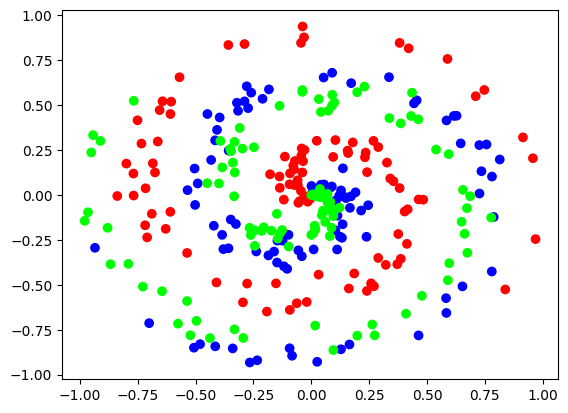

In [ ]:
import numpy as np
import nnfs
nnfs.init()

import matplotlib.pyplot as plt
X, Y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [ ]:
X.shape

(300, 2)

In [ ]:
# Define layer
class Layer_Dense:
    # Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Initialize Small random weights
        self.biases = np.zeros((1, n_neurons))  # Zero biases
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


X, y = spiral_data(samples=100, classes=3)

# Generate Dense layer with two input and three output features (i.e. 3 neurons)
dense1 = Layer_Dense(2,3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Lets see the output for few samples
print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


# Ch. 4 Activation Functions

In [ ]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
# Relu Activation
outputs = np.maximum(0,inputs)
outputs

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

In [ ]:
class Activation_Relu:
    # Forward Pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# Let’s apply this activation function to the dense layer’s outputs in our code:
X, y = spiral_data(samples=100, classes=3)

# Create dense layer with 2 input features and 3 output  values
dense1 = Layer_Dense(2,3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_Relu()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3395325e-05 8.9631088e-05 0.0000000e+00]
 [2.0761197e-04 0.0000000e+00 2.2857983e-04]
 [3.2332254e-04 0.0000000e+00 3.9302220e-04]
 [2.4741559e-04 2.1847372e-04 1.6104690e-04]]


# Softmax Activation
* Relu is un-normalized (i.e. values can be anything)

In [ ]:
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)
print(f'Exponentiated values: {exp_values}')

norm_values = exp_values/np.sum(exp_values)
print(f'norm_values: {norm_values}')

print('sum of normalized values:', np.sum(norm_values))

Exponentiated values: [121.51041752   3.35348465  10.85906266]
norm_values: [0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999



* For batch data we have to sum the exponentiated values column wise. i.e. axis=1
* in a 2D array/matrix, axis 0 refers to the rows, and axis 1 refers to the
columns.
* default axis is zero. sum row-wise,


In [ ]:
import numpy as np
layer_outputs = np.array([[4.8, 1.21, 2.385],
 [8.9, -1.81, 0.2],
 [1.41, 1.051, 0.026]])

print('Sum axis 1, but keep the same dimensions as input:')
print(np.sum(layer_outputs, axis=1, keepdims=True))

Sum axis 1, but keep the same dimensions as input:
[[8.395]
 [7.29 ]
 [2.487]]


In [ ]:
'''
# Two main pervasive challenges
1. “dead neurons”:

2. Exploding Values: due to exponential function used in softmax activation
* Substract maximum value by itself before calculation
* With Softmax, thanks to the normalization, we can subtract any
value from all of the inputs, and it will not change the output
'''

class Activation_Softmax:
  def forward(self, inputs):
      # Get unnormalized probabilities
      exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

      # Normalize them for each sample
      probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
      self.output = probabilities

# Ch.5 Calculating Network Error with Loss

In [ ]:
# Loss
# ------------------------------------------------q
#  loss is a useful metric for optimizing a model
import math

'''
softmax_loss = - sum( target * log(prediction) )
'''

softmax_output = [.7,.1,.2]
target_output = [1,0,0]
loss= -(
    math.log(softmax_output[0])*target_output[0] +
    math.log(softmax_output[1])*target_output[1] +
    math.log(softmax_output[2])*target_output[2]
    )
print(loss)

# Alternatively : because one hot encoding makes second and third terms zero
loss = -math.log(softmax_output[0])

0.35667494393873245


In [ ]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
  ])

class_targets = [0, 1, 1] # dog, cat, cat
'''
first value, 0, in class_targets means the first softmax output distribution’s intended
prediction was the one at the 0th index of [0.7, 0.1, 0.2]; the model has a 0.7 confidence
score that this observation is a dog
'''

# mapping the indices to retrieve the values from the softmax distributions


for target_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[target_idx])

# Alternatively
print(softmax_outputs[[0,1,2], class_targets])

# Alternatively
print(softmax_outputs[
 range(len(softmax_outputs)), class_targets
])


# Negagive loss
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
print(f' -ve log:{neg_log}')

# Arithmetic mean for loss per batch
average_loss = np.mean(neg_log)
print(average_loss)

0.7
0.5
0.9
[0.7 0.5 0.9]
[0.7 0.5 0.9]
 -ve log:[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [ ]:
import numpy as np
softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]]
    )

class_targets = np.array(
    [[1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]]
    )

# Probabilities for target values -
# only if categorical labels
# Sparse values
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)), class_targets
    ]
# Mask values - only for one-hot encoded labels
else:
    correct_confidences = np.sum(
        softmax_outputs*class_targets,
        axis=1
    )
# Losses
neg_log = -np.log(correct_confidences)

average_lolss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


In [ ]:
'''
* Problem: -np.log(0) -> infinity
* solution: add a very small value small value 1e-7  to the confidence to prevent it from being a zero,
* problem: -np.log(1) -> 0
'''
import numpy as np

print(f' -log(0): {-np.log(0)}')

# Confidence in correct label becomes negative
print(f' adding very small value: {-np.log(1+1e-7)}')

# makes loss a very small value instead of zero, but wont make it a negative value
print(f' substracting very small value: {-np.log(1-1e-7)}', end='\n\n')


# This method can perform clipping on an array of values, so we can apply it to the predictions directly
y_pred_clipped = np.clip(0, 1e-7, 1 - 1e-7)
y_pred_clipped

 -log(0): inf
 adding very small value: -9.999999505838704e-08
 substracting very small value: 1.0000000494736474e-07



<ipython-input-68-075a6139620d>:8: RuntimeWarning: divide by zero encountered in log
  print(f' -log(0): {-np.log(0)}')


1e-07

In [ ]:
# Categorical crossentropy loss class
# -------------------------------

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # Given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [ ]:
## Accuracy Calculation
# ---------------------
import numpy as np

# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])

# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)

# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)

# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666


## Code till now

In [15]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)


[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104


# Ch.6 Introducing Optimization

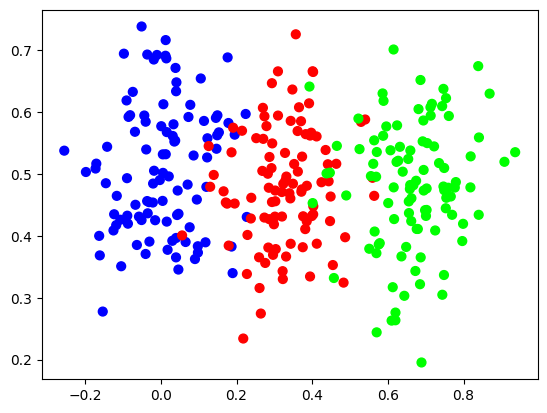

In [9]:
!pip install nnfs -q
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg')
plt.show()

In [20]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # First dense layer 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)# Second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create a loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 99999 # Some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.biases += 0.05*np.random.randn(1,3)

    # perform a forward pass of training data throught this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense1.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - pring and save weights and biases aside
    if loss < lowest_loss:
        print("New Set of weights found, iteration: ", iteration, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()

        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New Set of weights found, iteration:  0 loss: 1.1080168 acc: 0.3333333333333333
New Set of weights found, iteration:  1 loss: 1.0975143 acc: 0.3333333333333333
New Set of weights found, iteration:  29 loss: 1.0881526 acc: 0.38333333333333336
New Set of weights found, iteration:  30 loss: 1.0823746 acc: 0.37333333333333335


# Ch.7 Derivatives
* Method-1: Numerical Method
  * never gets more complicated
* Method-2: Analytical Method
  *  exact and much quicker
  * Very in complexity

[0 1 2 3 4]
[0 2 4 6 8]


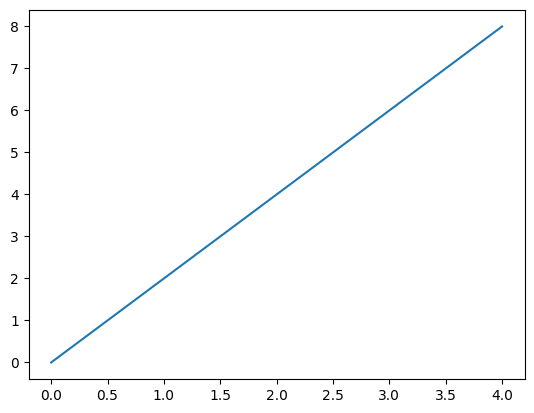

In [23]:
# plotting a function
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 2*x
f(2)

x=np.array(range(5))
y=f(x)

print(x)
print(y)

plt.plot(x, y)
plt.show()

(2, 8) (2.0001, 8.000800020000002)


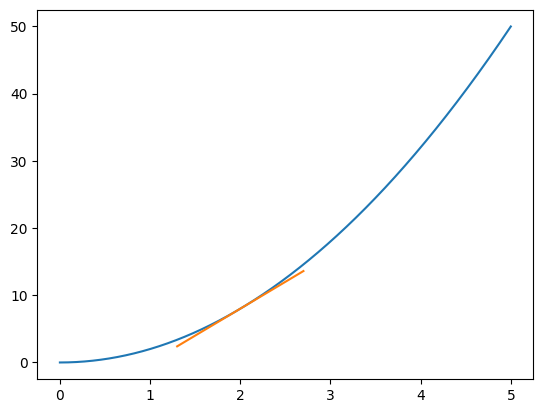

Approximate derivative for f(x) where x = 2 is 8.000199999998785


In [27]:
# Numerical Derivative
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x=np.arange(0,5,.001)
y=f(x)
plt.plot(x, y)

# The point and "close enough" point
p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)
print((x1, y1), (x2, y2))

# Derivative approximation of y-intercept for the tangent line
approximate_derivative = (y2-y1)/(x2-x1)
b = y2 - approximate_derivative*x2  # from: y = mx + c

# We put the tangent line calculation into a function so we can call
# it multiple times for different values of x
# approximate_derivative and b are constant for given function
# thus calculated once above this function
def tangent_line(x):
 return approximate_derivative*x + b

# plotting the tangent line
# +/- 0.9 to draw the tangent line on our graph
# then we calculate the y for given x using the tangent line function
# Matplotlib will draw a line for us through these points
to_plot = [x1-0.9, x1, x1+0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

plt.show()

print('Approximate derivative for f(x)', f'where x = {x1} is {approximate_derivative}')

plt.show()

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


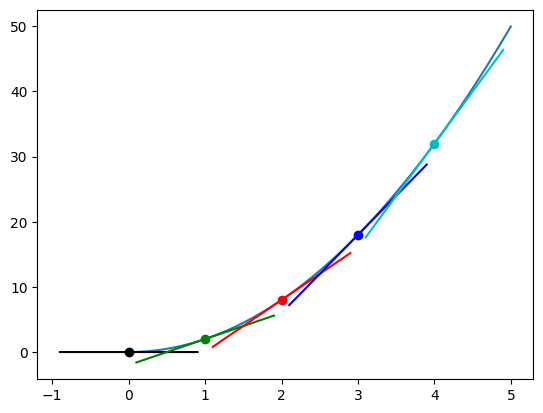

In [28]:
# plot multiple tangent lines
import matplotlib.pyplot as plt
import numpy as np

def f(x):
   return 2*x**2

# np.arange(start, stop, step) to give us a smoother curve
x = np.array(np.arange(0, 5, 0.001))
y = f(x)
plt.plot(x, y)
colors = ['k', 'g', 'r', 'b', 'c']
def approximate_tangent_line(x, approximate_derivative):
   return (approximate_derivative*x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta

    y1 = f(x1)
    y2 = f(x2)

    print((x1, y1), (x2, y2))
    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2-(approximate_derivative*x2)

    to_plot = [x1-0.9, x1, x1+0.9]

    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot],
        [approximate_tangent_line(point, approximate_derivative)
          for point in to_plot],
        c=colors[i])
    print('Approximate derivative for f(x)',
          f'where x = {x1} is {approximate_derivative}')
plt.show()

## Ch.9 Backpropagation